In [54]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
# import Datasets
df = pd.read_csv('cleaned_data.csv')
df

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   id                       569 non-null    int64  
 2   diagnosis                569 non-null    object 
 3   radius_mean              569 non-null    float64
 4   texture_mean             569 non-null    float64
 5   perimeter_mean           569 non-null    float64
 6   area_mean                569 non-null    float64
 7   smoothness_mean          569 non-null    float64
 8   compactness_mean         569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concave points_mean      569 non-null    float64
 11  symmetry_mean            569 non-null    float64
 12  fractal_dimension_mean   569 non-null    float64
 13  radius_se                569 non-null    float64
 14  texture_se               5

In [60]:
# Separate features and target variable
x = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target

In [61]:
# Split dataset into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
# Normalize features using StandardScaler (important for Logistic Regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [63]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [64]:
# Predict on test data
y_pred = reg.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [65]:
# Evaluate Model Performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [66]:
conf_matrix

array([[68,  3],
       [ 2, 41]])

In [67]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.97      0.96      0.96        71\n           1       0.93      0.95      0.94        43\n\n    accuracy                           0.96       114\n   macro avg       0.95      0.96      0.95       114\nweighted avg       0.96      0.96      0.96       114\n'

In [68]:
# Print results
print(f"Accuracy Score: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy Score: 0.9561

Confusion Matrix:
[[68  3]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



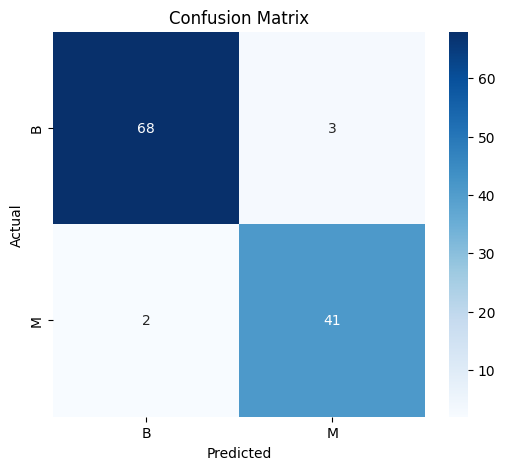

In [72]:
#  ---- 1. Confusion Matrix Heatmap ----
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


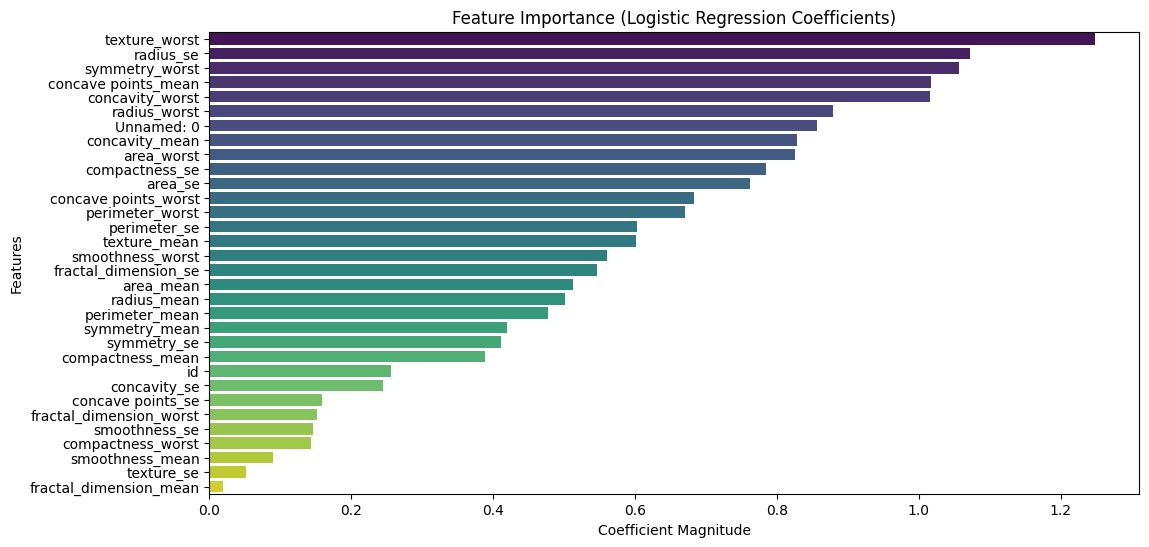

In [70]:
# ---2. Feature Importance (Coefficient Values) ----
feature_importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': np.abs(reg.coef_[0])})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.show()

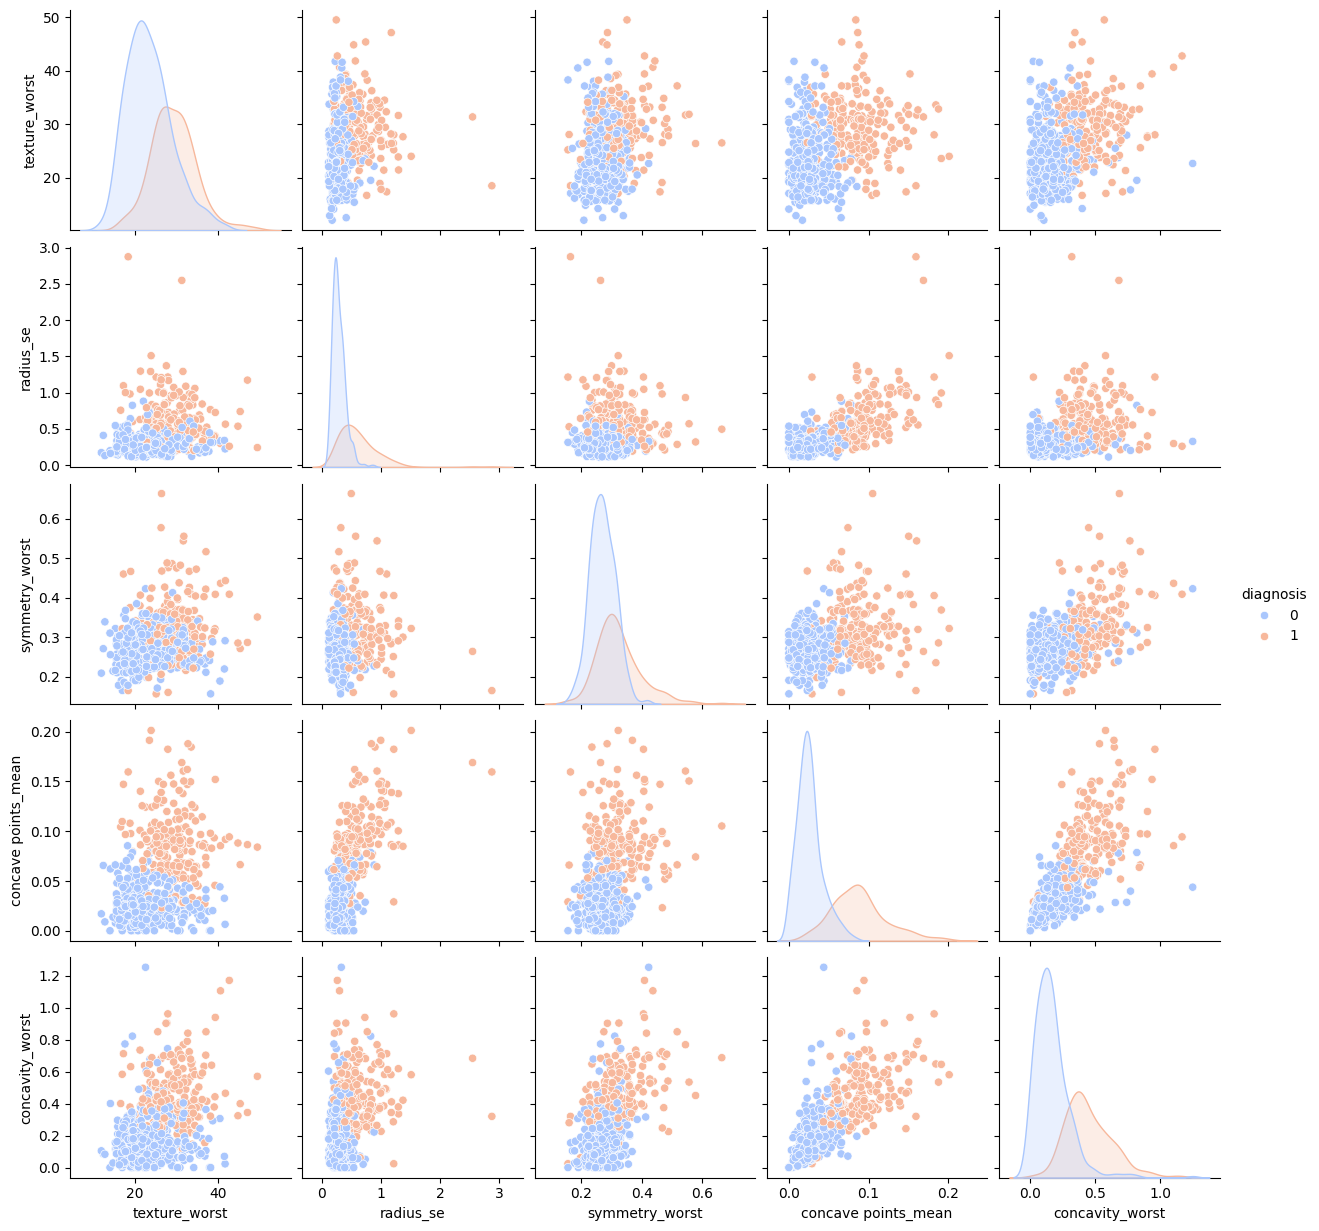

In [71]:
# Select top 5 most important features
top_features = feature_importance['Feature'][:5].tolist()

# Create a pairplot
sns.pairplot(df, hue='diagnosis', vars=top_features, palette='coolwarm')
plt.show()